<a href="https://colab.research.google.com/github/sayalimohite12/Airbnb-12/blob/main/Copy_of_Airbnb_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1. Neighbourhood groups with highest count among all.
2. Availability of rooms in different areas.
3. Analysis of various rooms type in different areas.
4. Neighbourhood group analysis based on Latitude and Longitude.
5. Price Exploration in neighbourhood group and neighbourhood
6. Price variation based on neighbourhood group and availability_365.
7. Relation between neighbourhood group and Availability of number of days for room.
8. Number of Property owned by each neighbourhood groups.
9. Different rooms distribution based on neighbourhood groups.
10. Correlation among different data sets(columns).
11. Which hosts are the busiest and why?
12. What can we learn from predictions? (ex: locations, prices, reviews, etc)
13. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
14. What can we learn about different hosts and areas?




# Why we need Airbnb Booking analysis ?

Airbnb, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.

Airbnb makes money by charging guests and hosts for short-term rental stays in private homes or apartments booked through the Airbnb website.The short-term rental business has seen good growth in the past decade.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.  Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



# Analysis of some queries related to Airbnb Bookings

In [ ]:
import pandas as pd
import numpy as np
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019 (1).csv'
df = pd.read_csv(file_path)

In [ ]:
df['neighbourhood_group'].value_counts()

<Axes: title={'center': 'Neighbourhood Group Counts'}, xlabel='Neighbourhood Group', ylabel='Count'>

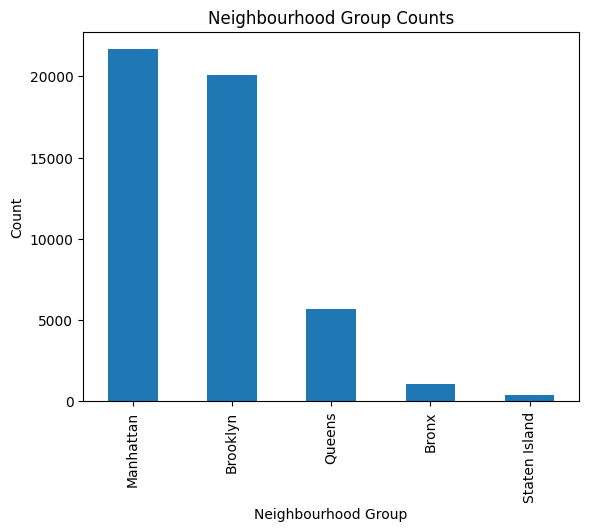

In [ ]:
df['neighbourhood_group'].value_counts().plot(kind='bar', title='Neighbourhood Group Counts', xlabel='Neighbourhood Group', ylabel='Count')


<Axes: title={'center': 'Average Room Availability by Neighbourhood Group'}, xlabel='Neighbourhood Group', ylabel='Average Availability (Days)'>

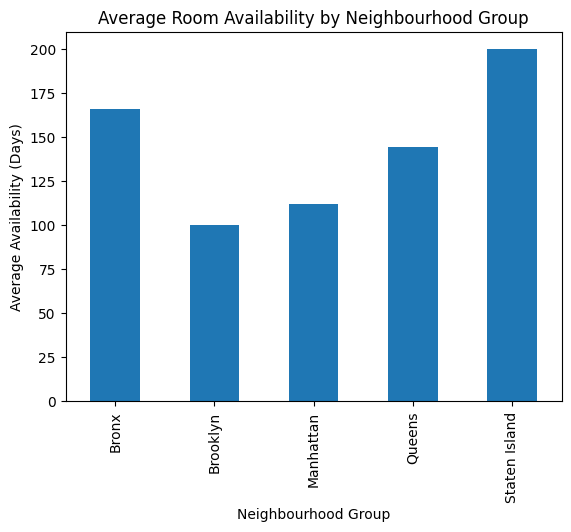

In [ ]:
availability_by_area = df.groupby('neighbourhood_group')['availability_365'].mean()

availability_by_area.plot(kind='bar', title='Average Room Availability by Neighbourhood Group', xlabel='Neighbourhood Group', ylabel='Average Availability (Days)')


<Axes: title={'center': 'Room Type Distribution by Neighbourhood Group'}, xlabel='neighbourhood_group'>

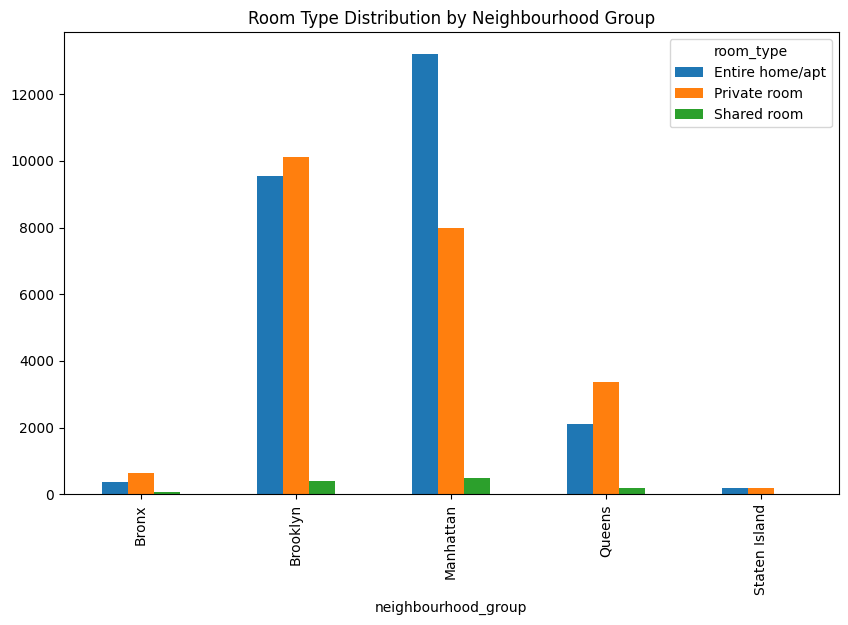

In [ ]:
room_type_by_area = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().reset_index(name='count')

room_type_by_area = room_type_by_area.pivot(index='neighbourhood_group', columns='room_type', values='count')

room_type_by_area.plot(kind='bar', figsize=(10, 6), title='Room Type Distribution by Neighbourhood Group')


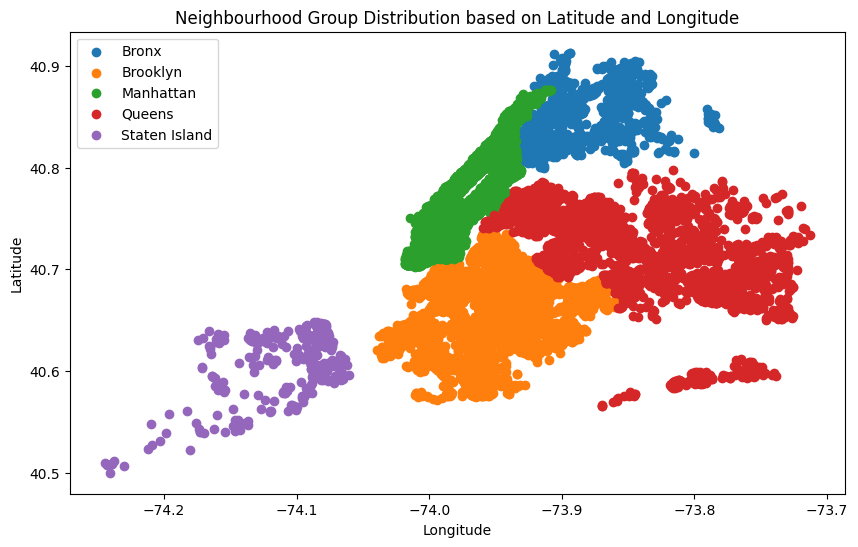

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for group, data in df.groupby('neighbourhood_group'):
  plt.scatter(data['longitude'], data['latitude'], label=group)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood Group Distribution based on Latitude and Longitude')
plt.legend()
plt.show()


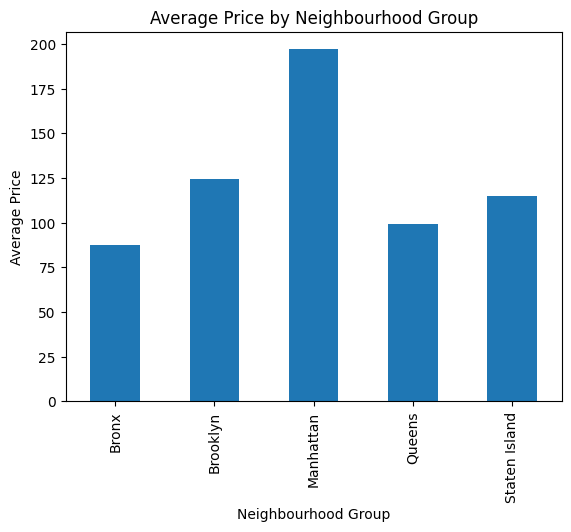

In [ ]:
avg_price_by_neighbourhood_group = df.groupby('neighbourhood_group')['price'].mean()

avg_price_by_neighbourhood_group.plot(kind='bar', title='Average Price by Neighbourhood Group', xlabel='Neighbourhood Group', ylabel='Average Price')

avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean()

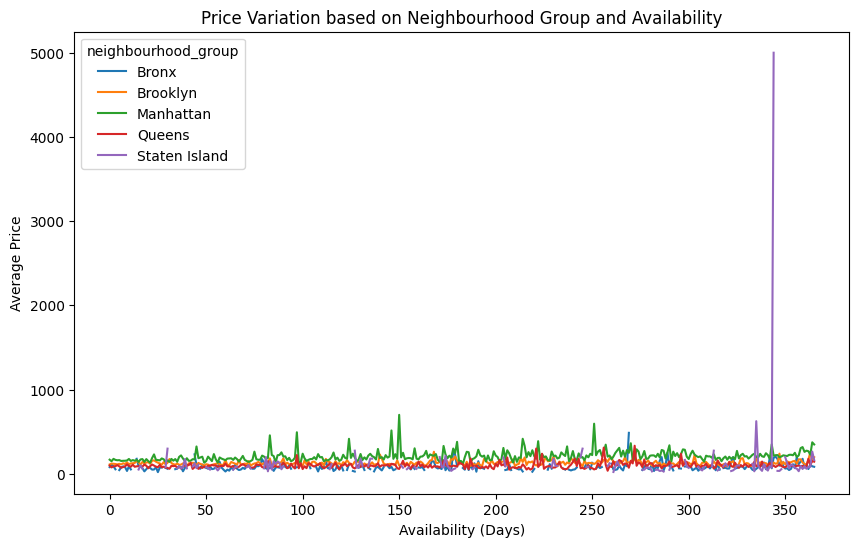

In [ ]:
import matplotlib.pyplot as plt

price_variation = df.groupby(['neighbourhood_group', 'availability_365'])['price'].mean().reset_index()

price_variation = price_variation.pivot(index='availability_365', columns='neighbourhood_group', values='price')

price_variation.plot(kind='line', figsize=(10, 6), title='Price Variation based on Neighbourhood Group and Availability')
plt.xlabel('Availability (Days)')
plt.ylabel('Average Price')
plt.show()


<Axes: title={'center': 'Average Availability of Rooms by Neighbourhood Group'}, xlabel='Neighbourhood Group', ylabel='Average Availability (Days)'>

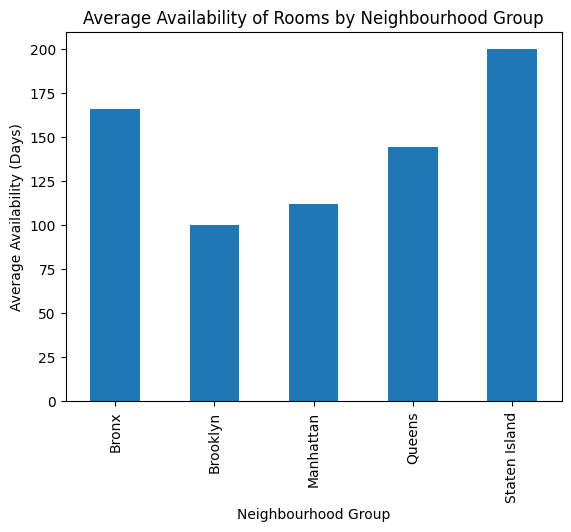

In [ ]:
avg_availability_by_neighbourhood_group = df.groupby('neighbourhood_group')['availability_365'].mean()

avg_availability_by_neighbourhood_group.plot(kind='bar', title='Average Availability of Rooms by Neighbourhood Group', xlabel='Neighbourhood Group', ylabel='Average Availability (Days)')


<Axes: title={'center': 'Number of Properties by Neighbourhood Group'}, xlabel='Neighbourhood Group', ylabel='Number of Properties'>

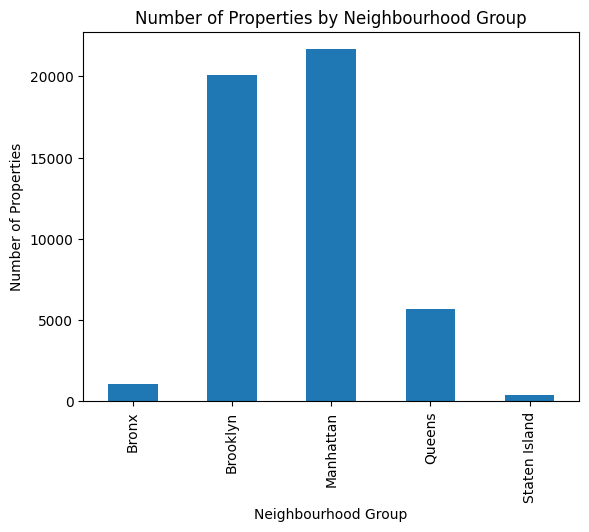

In [ ]:
property_count_by_neighbourhood_group = df.groupby('neighbourhood_group')['id'].nunique()

property_count_by_neighbourhood_group.plot(kind='bar', title='Number of Properties by Neighbourhood Group', xlabel='Neighbourhood Group', ylabel='Number of Properties')


<Axes: title={'center': 'Room Type Distribution by Neighbourhood Group'}, xlabel='neighbourhood_group'>

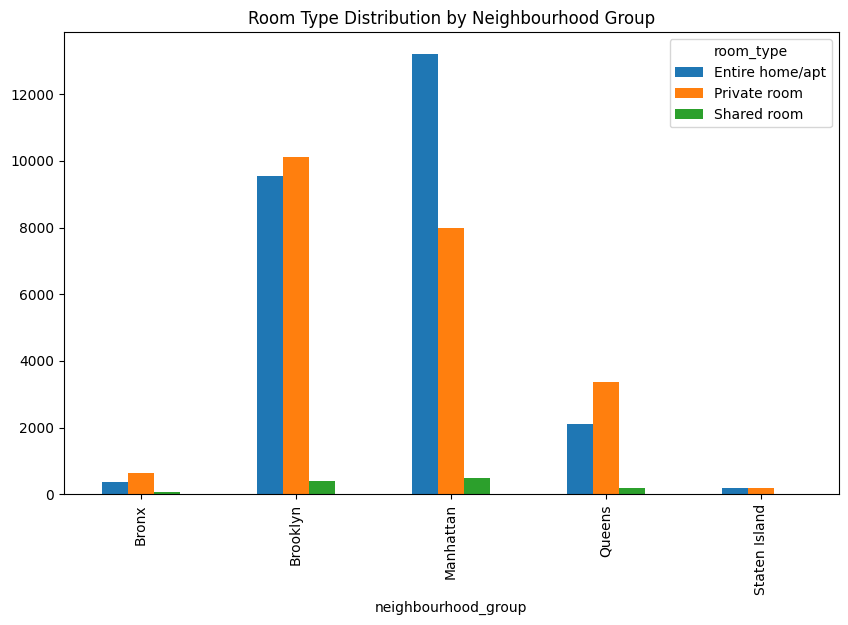

In [ ]:
room_type_by_neighbourhood_group = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().reset_index(name='count')

room_type_by_neighbourhood_group = room_type_by_neighbourhood_group.pivot(index='neighbourhood_group', columns='room_type', values='count')

room_type_by_neighbourhood_group.plot(kind='bar', figsize=(10, 6), title='Room Type Distribution by Neighbourhood Group')


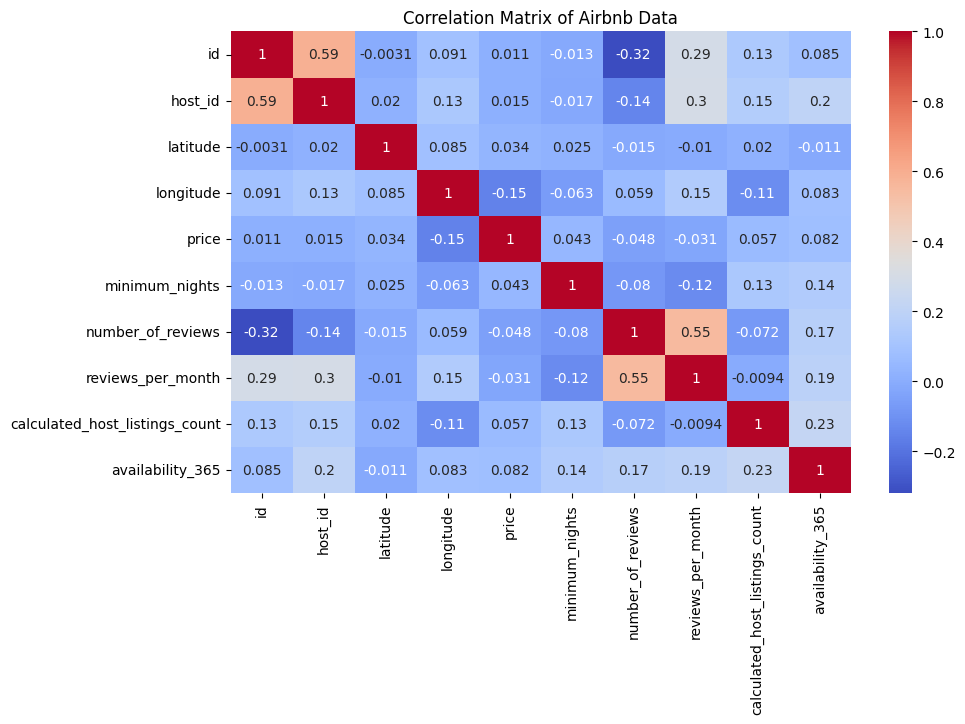

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Airbnb Data')
plt.show()


In [ ]:
host_listings = df.groupby('host_id')['id'].count().reset_index(name='listing_count')

host_listings = host_listings.sort_values(by='listing_count', ascending=False)

top_10_hosts = host_listings.head(10)

print(top_10_hosts)

         host_id  listing_count
34646  219517861            327
29407  107434423            232
19574   30283594            121
31079  137358866            103
14436   16098958             96
12806   12243051             96
25662   61391963             91
17091   22541573             87
33868  200380610             65
3044     1475015             52


<Axes: title={'center': 'Number of Reviews by Neighbourhood Group'}, xlabel='Neighbourhood Group', ylabel='Number of Reviews'>

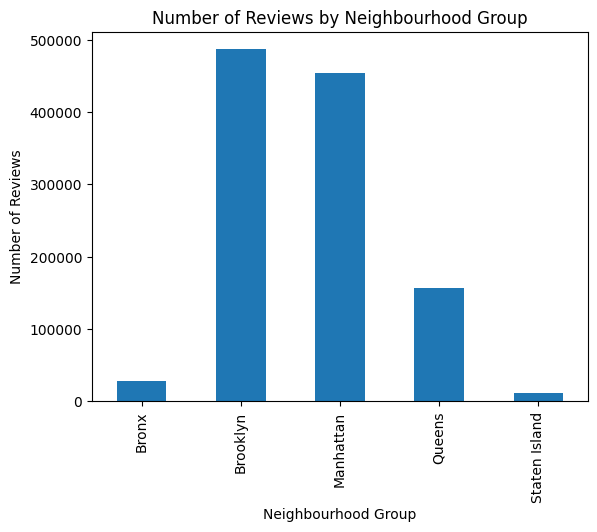

In [ ]:
reviews_by_neighbourhood_group = df.groupby('neighbourhood_group')['number_of_reviews'].sum()

reviews_by_neighbourhood_group.plot(kind='bar', title='Number of Reviews by Neighbourhood Group', xlabel='Neighbourhood Group', ylabel='Number of Reviews')

In [ ]:
host_listings = df.groupby('host_id')['id'].count().reset_index(name='listing_count')

host_listings = host_listings.sort_values(by='listing_count', ascending=False)

top_10_hosts = host_listings.head(10)

print(top_10_hosts)

         host_id  listing_count
34646  219517861            327
29407  107434423            232
19574   30283594            121
31079  137358866            103
14436   16098958             96
12806   12243051             96
25662   61391963             91
17091   22541573             87
33868  200380610             65
3044     1475015             52
